# DATA 620 FINAL PROJECT

# NNAEMEZUE OBI-EYISI

# AMAZON PRODUCT CO PURCHASING NETWORK ANALYSIS AND RECOMMENDER SYSTEM





In this project I intend to first analyze a dataset on amazon co purchasing network of products. My goal is to analyze how the products in different categories like DVD and videos are being co purchased. 

In the second part of this project, I will use a different dataset which is meant to be the metadata of the first amazon copurchasing network to create a book recommendation system based on the copurchasing data and other relevant metrics like Average rating, word stemming of the book categories and Total reviews.




Let's process the semi structured source into an output file that has a dataframe structure.


# Amazon co purchasing Network analysis

Edges show co-purchasing links between products. Customers who bought x also bought y, but not always vice versa

The visualization is based on Amazon Product co-purchasing data set and its metadata. The data set contains 1234877 co-purchasing links in the below tabular format.

Datasource is found https://snap.stanford.edu/data/com-Amazon.html

In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import count
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('https://DL.dropbox.com/s/w6f5s6mma9bqiu2/Amazon0302.txt?dl=1',sep='	',
                 header=None,skiprows=4,
                 names=[ 'From_Node', 'To_Node'])
df.head()


,From_Node,To_Node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


Let's create a network from the dataframe

In [4]:
g = nx.from_pandas_edgelist(df, 'From_Node', 'To_Node')

In [8]:
import os
os.chdir("C:/Users/Mezu/Documents/Data620")




1


Let's process the semi structured source into an output file that has a dataframe structure.

Please download the source file into local directory https://dl.dropbox.com/s/nk0zmwqfp069dul/amazon-meta.txt?dl=1


In [21]:
#Read all lines of the meta data into content list.


fname = "amazon-meta.txt"
with open(fname, encoding = 'utf8') as f:
    content = f.readlines()
#Remove the beginning and trailing white spaces.
content = [x.strip() for x in content] 
 
# Write extracted information to testfile.txt in a format of ',' demilited files.
# The columns are Id, title, group, categories, totalreviews, avgrating.
# The code stores all extracted information about a product into previoulines,
# and write the content into file only when all information are available. Hence,
# if review information for a product is not available, the product won't appear
# in the final file.
file = open("Amazon_outputfile.txt","w", encoding='utf8')
previouslines = ['Id', 'title', 'group', 'categories', 'totalreviews', 'avgrating']
for line in content:
    lines = line.split(':')
    if lines[0] == "Id":
        if (len(previouslines) == 6):
            for component in previouslines[0:5]:
                file.write(component)
                file.write(',')
            file.write(previouslines[5])
            file.write("\n")
        previouslines = []
        previouslines.append(lines[1].strip())
         
    if lines[0] == "title":
        title = ':'.join(lines[1:]).strip().replace(',', ' ').replace('\n', ' ').strip()
        previouslines.append(title)
        
    if lines[0] == "group":
        previouslines.append(lines[1].strip())
 
    if lines[0] == "categories":
        previouslines.append(lines[1].strip())
     
    if lines[0] == "reviews" and lines[1].strip() == "total":
        previouslines.append(lines[2].split(' ')[1])
        previouslines.append(lines[4].strip())
file.close()
print(1)

1


After file preprocessing into an outputfile that is structure. We would now read it into a data frame

In [10]:
df_meta = pd.read_csv('Amazon_outputfile.txt',
                 sep=',')

In [11]:
df_meta.head()

,Id,title,group,categories,totalreviews,avgrating
0,1,Patterns of Preaching: A Sermon Sampler,Book,2,2,5.0
1,2,Candlemas: Feast of Flames,Book,2,12,4.5
2,3,World War II Allied Fighter Planes Trading Cards,Book,1,1,5.0
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,5,1,4.0
4,5,Prayers That Avail Much for Business: Executive,Book,2,0,0.0


Let's list the various groups of products we have in our dataset

In [12]:
set(df_meta['group'])

{'Baby Product',
 'Book',
 'CE',
 'DVD',
 'Music',
 'Software',
 'Sports',
 'Toy',
 'Video',
 'Video Games'}

Now let's attach the group attribute to each node in our network

In [13]:
attr_dict = dict(zip(df_meta.Id, df_meta.group))

nx.set_node_attributes(g, attr_dict, 'group')

In [14]:
print(g.number_of_nodes(), g.number_of_edges())

262111 899792


This dataset has 262111 unique nodes and 899792 edges. Let's analyze the distribution of nodes by the product group

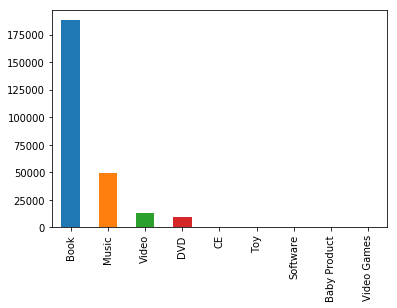

In [15]:
node_groups = list(nx.get_node_attributes(g, 'group').values())
pd.value_counts(node_groups).plot.bar()

We can see the majority of the nodes in our dataset are Books.

Let's visualize our entire network, analyzing how the various products groups associate with each other. This means that when customers buy a product they might be buying other products in a different product group for some reason. For example, I might buy a DVD movie that was based on a book. It is plausible that I might decide to include the book in my shopping cart as I buy the DVD movie


In this case i will focus on the people that purchase DVDs


59773 63246


(array([3.742e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.00000e+00, 2.26040e+03, 4.51880e+03, 6.77720e+03, 9.03560e+03,
        1.12940e+04, 1.35524e+04, 1.58108e+04, 1.80692e+04, 2.03276e+04,
        2.25860e+04]),
 <a list of 10 Patch objects>)

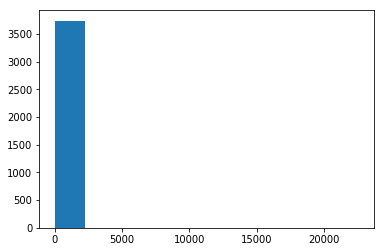

In [16]:
DVD_nodes=set(df_meta[df_meta['group']=='DVD'].Id)
DVD_df=df[df.From_Node.isin(DVD_nodes) | df.To_Node.isin(DVD_nodes) ]

g_DVD = nx.from_pandas_edgelist(DVD_df, 'From_Node', 'To_Node')
nx.set_node_attributes(g_DVD, attr_dict, 'group')
print(g_DVD.number_of_nodes(), g_DVD.number_of_edges())

x=[len(c) for c in nx.connected_component_subgraphs(g_DVD)] 
plt.hist(x)



This histogram above shows a large the sub graph network where the majority of the network are less than 2500 sub node clusters. 

In [18]:
big_subg = [i for i in nx.connected_component_subgraphs(g_DVD) if len(i) > 22000]
# Largest:

print(big_subg[0].number_of_nodes(), big_subg[0].number_of_edges())


22586 25959


The biggest subnet of interest is below has about 22,586 nodes.

We can see that the number of nodes from the main graph and sub graphs are too large to be visualized on my local PC. I will subsequently visualize a smaller sub graph

3733
98 101


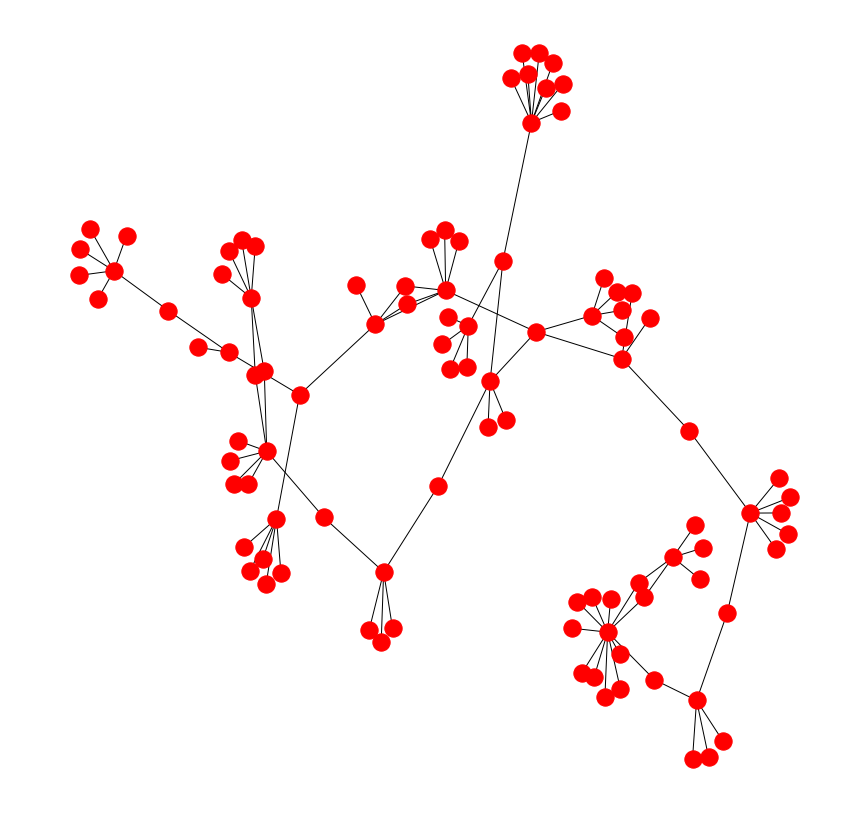

In [19]:
mid_subg = [i for i in nx.connected_component_subgraphs(g_DVD) if len(i) < 100]
print(len(mid_subg))

l=[]
max=0
pos=0
for i in range(0,3733):
    x= len(mid_subg[i])
    l.append(len(mid_subg[i]))
    if x>max:
        pos=i
        max=x

print(mid_subg[pos].number_of_nodes(), mid_subg[pos].number_of_edges())
plt.figure(figsize=(11, 11))
nx.draw(mid_subg[pos])

Let's draw in color codes for each product type

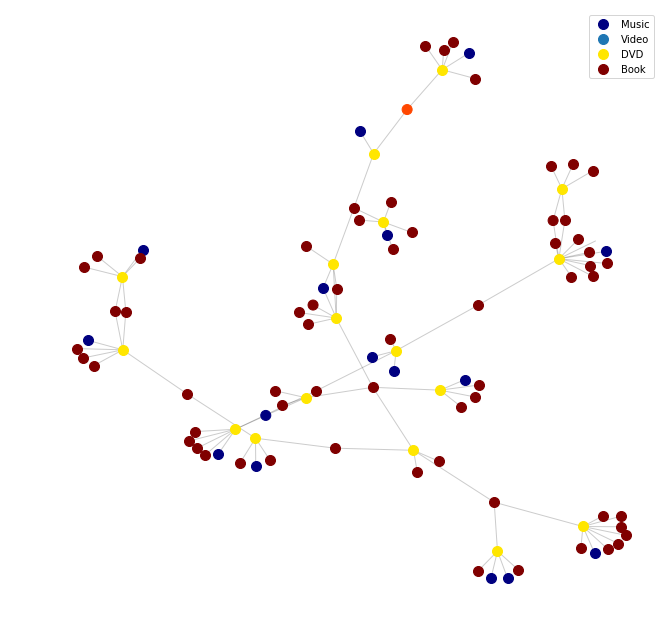

In [24]:
plt.figure(figsize=(11, 11))
groups = set(node_groups) # get unique groups
node_groups_dict = nx.get_node_attributes(mid_subg[pos], 'group')
colors = [plt.cm.jet(x) for x in np.linspace(0, 1, len(groups))]
poss = nx.spring_layout(mid_subg[pos])

for i, groups in enumerate(groups):
    group_nodes = [node for node, value in node_groups_dict.items() if value == groups]
    nx.draw_networkx_nodes(mid_subg[pos], poss, nodelist=group_nodes, node_color=colors[i], label=groups,
                           with_labels=False, node_size=100, cmap=plt.cm.jet)
nx.draw_networkx_edges(mid_subg[pos], poss, alpha=0.2)

plt.legend()
plt.axis('off')
plt.show()

This looks at the same graph but showing the various groups in color code. We can see how the DVD copurchase interacts with other product types

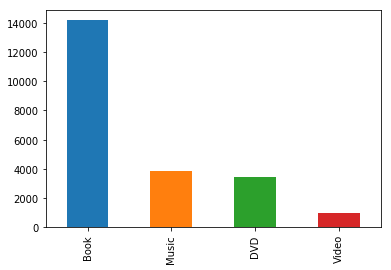

In [22]:
node_groups = list(nx.get_node_attributes(big_subg[0], 'group').values())
pd.value_counts(node_groups).plot.bar()

Due to the size of our dataset we would reduce the limit the netowork to products that involved a DVD and video co purchase

In [23]:
videos_nodes=set(df_meta[df_meta['group']=='Video'].Id)
DVD_video_df=DVD_df[DVD_df.From_Node.isin(videos_nodes) | DVD_df.To_Node.isin(videos_nodes) ]

g_DVD_video = nx.from_pandas_edgelist(DVD_video_df, 'From_Node', 'To_Node')
nx.set_node_attributes(g_DVD_video, attr_dict, 'group')
print(g_DVD_video.number_of_nodes(), g_DVD_video.number_of_edges())


5118 3113


We see this subnetwork has about 5,118 nodes and 3,113 edges. Let's see if there is a sub graph we can isolate using the island technique

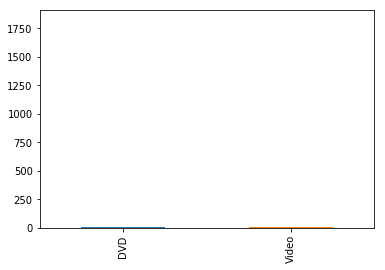

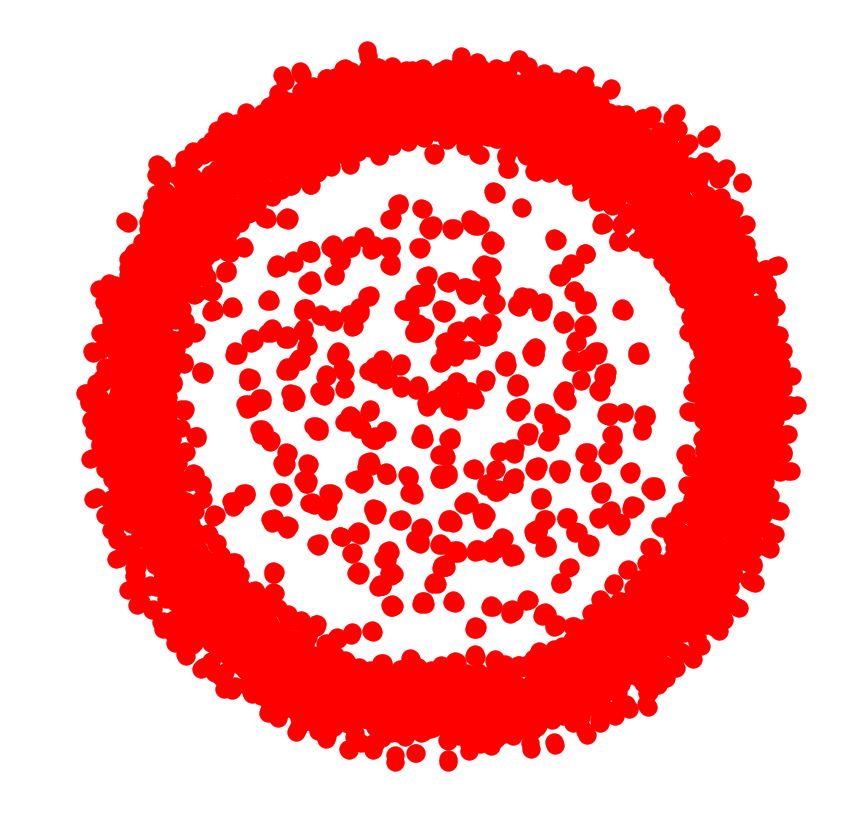

In [42]:
y=[len(c) for c in nx.connected_component_subgraphs(g_DVD_video)] 
plt.hist(y)
big_subg_dvd_vid = [i for i in nx.connected_component_subgraphs(g_DVD_video) if len(i) >5]
node_groups1 = list(nx.get_node_attributes(big_subg_dvd_vid[0], 'group').values())
pd.value_counts(node_groups1).plot.bar()
plt.figure(figsize=(11, 11))
nx.draw(g_DVD_video)

Draw the sub network with a high degree centrality. From the above network of DVD and video co purchasing network we can see that their are only few big  clusters of connections between Dvd and video purchasing

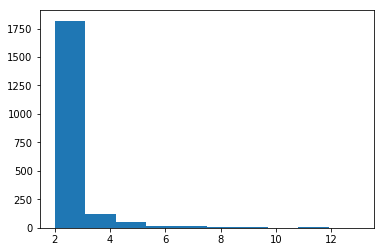

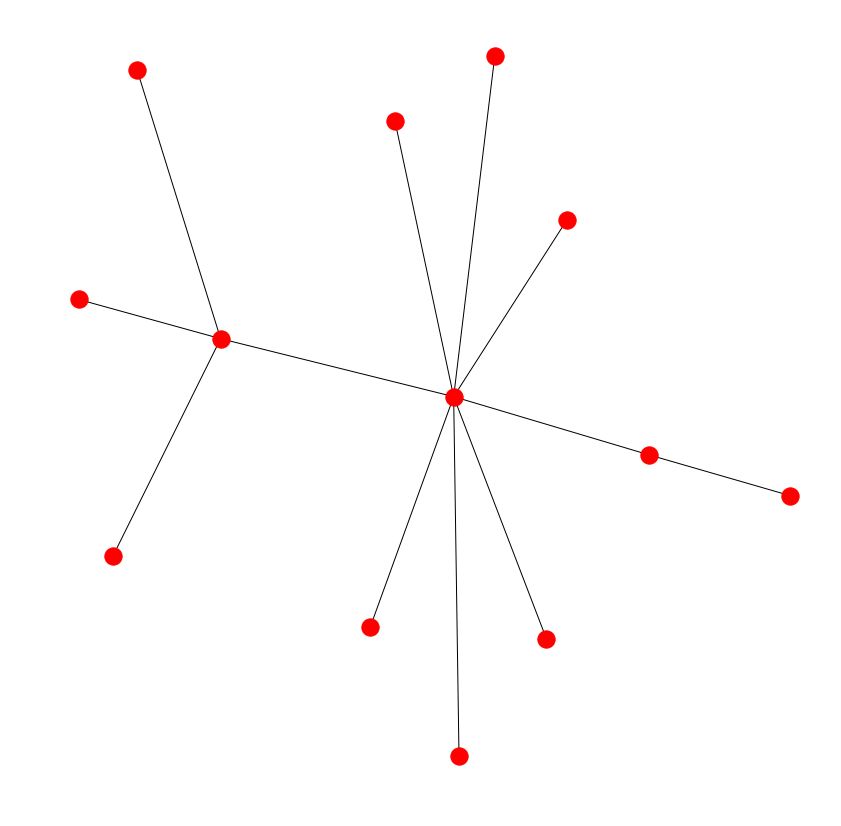

In [27]:
y=[len(c) for c in nx.connected_component_subgraphs(g_DVD_video)] 
plt.hist(y)
big_subg_dvd_vid = [i for i in nx.connected_component_subgraphs(g_DVD_video) if len(i) >12]
plt.figure(figsize=(11, 11))
nx.draw(big_subg_dvd_vid[0])

In the above we pick the largest subgraph and plot out the network

Visualizing the network with the color coding for each type of product below

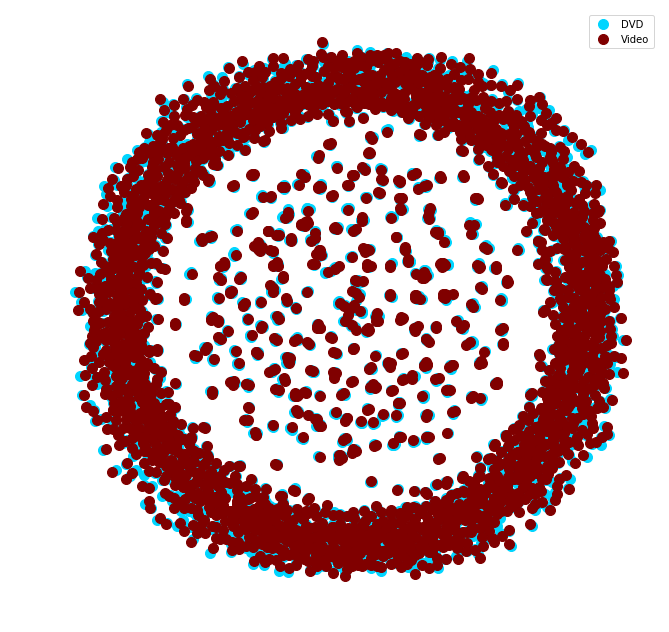

In [71]:
plt.figure(figsize=(11, 11))
groups = set(node_groups) # get unique groups
node_groups_dict = nx.get_node_attributes(g_DVD_video, 'group')
colors = [plt.cm.jet(x) for x in np.linspace(0, 1, len(groups))]
pos = nx.spring_layout(g_DVD_video)

for i, groups in enumerate(groups):
    group_nodes = [node for node, value in node_groups_dict.items() if value == groups]
    nx.draw_networkx_nodes(g_DVD_video, pos, nodelist=group_nodes, node_color=colors[i], label=groups,
                           with_labels=False, node_size=100, cmap=plt.cm.jet)
nx.draw_networkx_edges(g_DVD_video, pos, alpha=0.2)

plt.legend()
plt.axis('off')
plt.show()

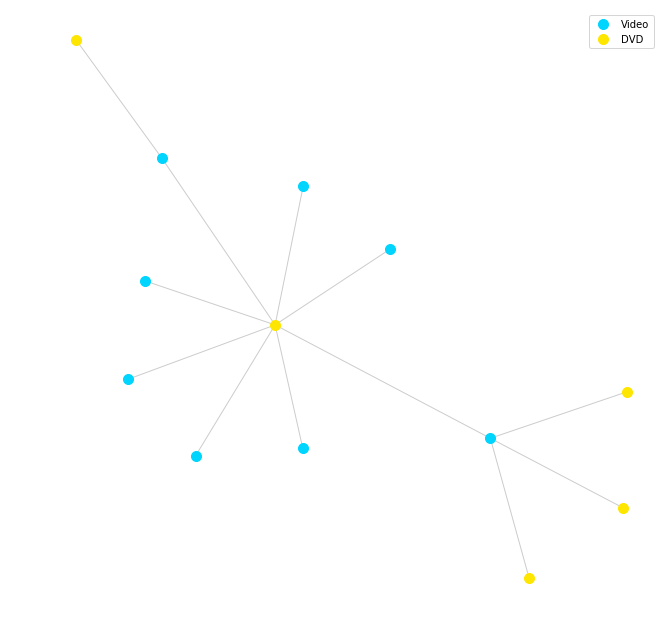

In [26]:
plt.figure(figsize=(11, 11))
groups = set(node_groups) # get unique groups
node_groups_dict = nx.get_node_attributes(big_subg_dvd_vid[0], 'group')
colors = [plt.cm.jet(x) for x in np.linspace(0, 1, len(groups))]
pos = nx.spring_layout(big_subg_dvd_vid[0])

for i, groups in enumerate(groups):
    group_nodes = [node for node, value in node_groups_dict.items() if value == groups]
    nx.draw_networkx_nodes(big_subg_dvd_vid[0], pos, nodelist=group_nodes, node_color=colors[i], label=groups,
                           with_labels=False, node_size=100, cmap=plt.cm.jet)
nx.draw_networkx_edges(big_subg_dvd_vid[0], pos, alpha=0.2)

plt.legend()
plt.axis('off')
plt.show()

NETWORK ANALYSIS OF THE DVD AND VIDEO CO PURCHASING SUB NETWORK

Degree centrality

In [45]:

deg=nx.degree(big_subg_dvd_vid[0]) 
#List top 10 most influential nodes 
deg_list=list(deg)
deg_list.sort(key=lambda no_edges:no_edges[1], reverse=True)
deg_list[0:10]

[(1295, 4), (159285, 2), (1294, 1), (229393, 1), (154070, 1), (120411, 1)]

In [46]:
deg=nx.degree(g_DVD_video) 
#List top 10 most influential nodes 
deg_list=list(deg)
deg_list.sort(key=lambda no_edges:no_edges[1], reverse=True)
deg_list[0:10]

[(12615, 9),
 (31034, 8),
 (9121, 7),
 (10920, 6),
 (9264, 6),
 (163817, 6),
 (881, 5),
 (15644, 5),
 (14439, 5),
 (44755, 5)]

Let's visualize the node with the maximum degree of centrality

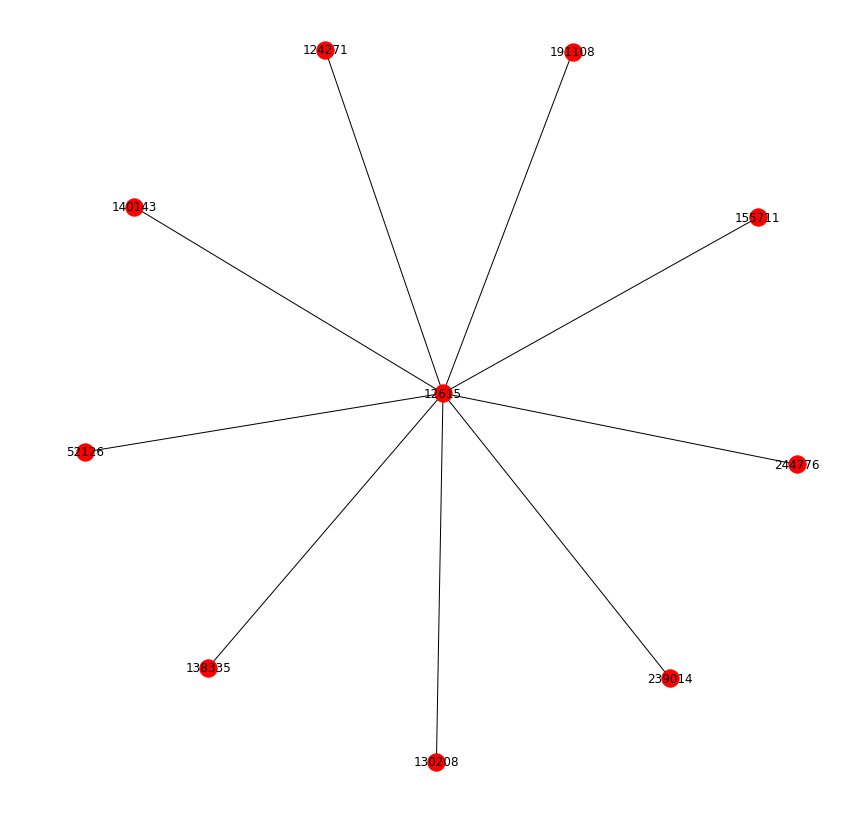

In [47]:
#for the maximum node
max_deg_node=deg_list[0][0]
list_dn=list(g_DVD_video[max_deg_node])
list_dn.append(max_deg_node)
g_sub=g_DVD_video.subgraph(list_dn)
plt.figure(figsize=(11, 11))
nx.draw(g_sub, with_labels=True)


Closeness Centrality
In closeness centrality we calculate for each node the average shortest path to any node on the network


In [48]:
g_close=nx.closeness_centrality(g_DVD_video)
g_close

g_close_sorted = sorted(g_close.items(), key=lambda kv: kv[1], reverse=True)
g_close_sorted


g_close_sorted_df=pd.DataFrame(g_close_sorted, columns=['node','closeness'])
g_close_sorted_df[:10]

,node,closeness
0,12615,0.001819
1,31034,0.001759
2,9121,0.001396
3,33269,0.001340
4,163817,0.001319
5,10920,0.001251
6,239014,0.001245
7,9264,0.001221
8,44755,0.001137
9,32879,0.001126


Betweenness Centrality
Betweenness is a measure of the degree to which nodes serve as bridges or bottlenecks between parts of the network. Nodes with betweenness connect parts of a network that would not otherwise be connected.

Looking at the 10 nodes with the highest betweenness, we see that this network does not have many nodes that serve as bridges and bottlenecks.

In [49]:
node_betweenness = nx.betweenness_centrality(g_DVD_video)
betw_sorted = sorted(node_betweenness.items(), key=lambda kv: kv[1], reverse=True)
betw_sorted_df = pd.DataFrame(betw_sorted, columns=['node', 'betweenness'])
betw_sorted_df.iloc[0:10,]

,node,betweenness
0,31034,0.000005
1,12615,0.000004
2,9121,0.000003
3,9264,0.000003
4,163817,0.000002
5,33269,0.000002
6,11427,0.000002
7,12403,0.000002
8,18164,0.000002
9,44755,0.000002


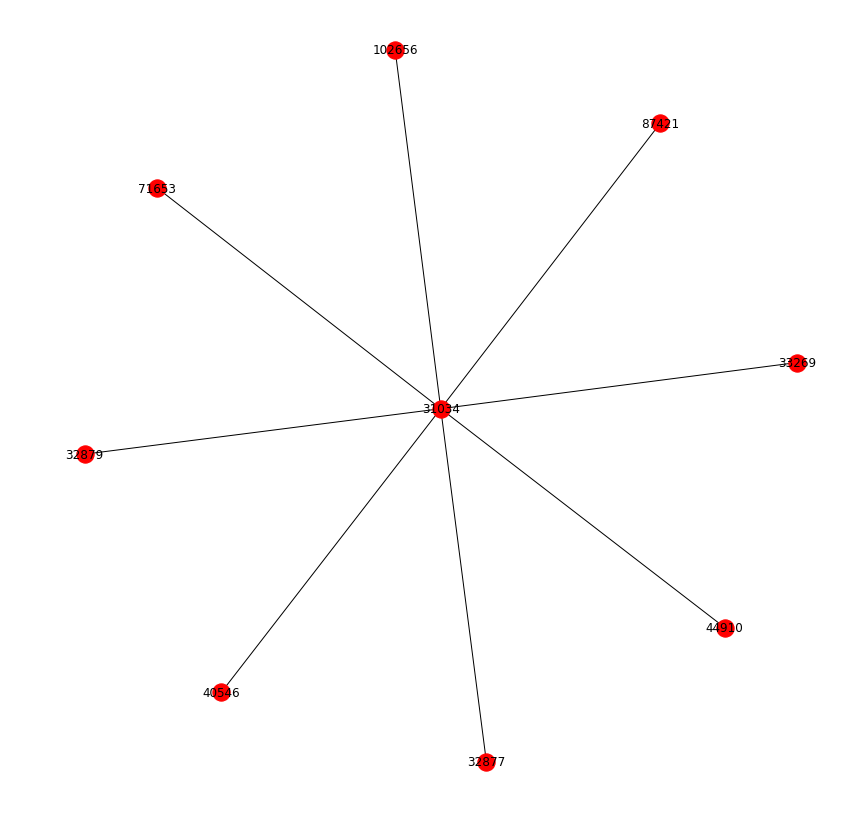

In [50]:
plt.figure(figsize=(11, 11))
g_ego = nx.ego_graph(g_DVD_video, betw_sorted_df.iloc[0, 0])
nx.draw(g_ego, with_labels=True)

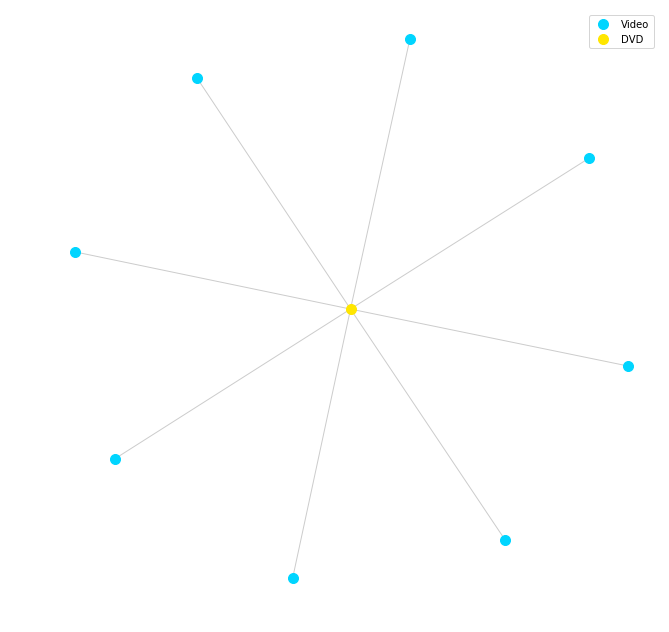

In [51]:
plt.figure(figsize=(11, 11))
groups = set(node_groups) # get unique groups
node_groups_dict = nx.get_node_attributes(g_ego, 'group')
colors = [plt.cm.jet(x) for x in np.linspace(0, 1, len(groups))]
pos = nx.spring_layout(g_ego)

for i, groups in enumerate(groups):
    group_nodes = [node for node, value in node_groups_dict.items() if value == groups]
    nx.draw_networkx_nodes(g_ego, pos, nodelist=group_nodes, node_color=colors[i], label=groups,
                           with_labels=False, node_size=100, cmap=plt.cm.jet)
nx.draw_networkx_edges(g_ego, pos, alpha=0.2)

plt.legend()
plt.axis('off')
plt.show()

From the above we see that the way a particular DVD links to videos


# Book recommendation system

Now using the amazon-meta data file we would reprocess and try to create a simple recommendation system using network analysis and NLP to stem the book categories. This will help us show the books that are very similar to another.

Let's re process the amazon metadata

In [30]:
import string
import re
from nltk.corpus import stopwords
from nltk.stem import * 
from __future__ import print_function
from nltk.stem.porter import *
#from stemming.porter import stem
import networkx
stemmer = PorterStemmer()

fname = "amazon-meta.txt"
fhr= open(fname,'r', encoding = 'utf8') 

amazonProducts ={}
(Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff )=("","","","","","",0,0,0.0,0,0.0)

for line in fhr:
    line = line.strip()
    if(line.startswith("Id")):
        Id = line[3:].strip()
    elif(line.startswith('ASIN')):
        ASIN = line[5:].strip()
    elif(line.startswith("title")):
        Title = line[6:].strip()
        Title = ''.join(Title.split())
    elif(line.startswith("group")):
        Group = line[6:].strip()
    elif(line.startswith("salesrank")):
        SalesRank = line[10:].strip()
    elif(line.startswith("similar")):
        ls = line.split()
        Copurchased = ' '.join([c for c in ls[2:]])
    elif(line.startswith("categories")):
        ls = line.split()
        Categories = ' '.join((fhr.readline()).lower() for i in range(int(ls[1].strip())))
        Categories = re.compile('[%s]' % re.escape(string.digits+string.punctuation)).sub(' ',Categories)
        Categories = ' '.join(set(Categories.split())-set(stopwords.words("english")))
        Categories = ' '.join(stemmer.stem(word) for word in Categories.split())
    elif(line.startswith("reviews")):
        ls = line.split()
        TotalReviews = ls[2].strip()
        AvgRating = ls[7].strip()
    elif(line==""):
        try:
            MetaData = {}
            if (ASIN != ""):
                amazonProducts[ASIN] =MetaData
            MetaData['Id'] =Id
            MetaData['Title'] = Title
            MetaData['Categories'] =' '.join(set(Categories.split()))
            MetaData['Group'] = Group
            MetaData['Copurchased'] = Copurchased
            MetaData['SalesRank'] = int(SalesRank)
            MetaData['TotalReviews'] = int(TotalReviews)
            MetaData['AvgRating'] = float (AvgRating)
            MetaData['DegreeCentrality'] = DegreeCentrality
            MetaData['ClusteringCoeff'] = ClusteringCoeff
        except NameError:
            continue
        (Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff )=("","","","","","",0,0,0.0,0,0.0)

fhr.close()

print(1+1)


2


We will filter amazonProducts Dictionary down to only Group= Book

In [32]:
amazonBooks ={}
for asin,metadata in amazonProducts.items():
    if (metadata['Group']=='Book'):
        amazonBooks[asin] = amazonProducts[asin]

#reomove any copurchased items without metadata

for asin, metadata in amazonBooks.items():
    amazonBooks[asin]['Copurchased'] = ' '.join([cp for cp in metadata['Copurchased'].split() if cp in amazonBooks.keys()])

print(1+1)

2



The ASINs are Nodes in the Graph
An Edge exists between two Nodes (ASINs) if the two ASINs were co-purchased
We create an Edge Weight (based on Category Similarity)

We can then use the Similarity measure as the Edge Weight between the Node pair that was co-purchased. We can potentially create such a Similarity measure by using the “Categories” data, where the Similarity measure between any two ASINs that were co-purchased is calculated as follows:
Similarity = (Number of words that are common between Categories of connected Nodes)/ (Total Number of words in both Categories of connected Nodes) 
The Similarity ranges from 0 (most dissimilar) to 1 (most similar)

In [55]:
copurchaseGraph = networkx.Graph()
for asin,metadata in amazonBooks.items():
    copurchaseGraph.add_node(asin)
    for a in metadata['Copurchased'].split():
        copurchaseGraph.add_node(a.strip())
        similarity = 0
        n1 = set((amazonBooks[asin]['Categories']).split())
        n2 = set((amazonBooks[a]['Categories']).split())
        n1In2 = n1 & n2
        n1Un2 = n1 | n2
        if (len(n1Un2)) > 0 :
            similarity = round(len(n1In2)/len(n1Un2),2)
        copurchaseGraph.add_edge(asin, a.strip(), weight=similarity)
print(1)

1


Let's add the graph related values to the each book item. In this case the DegreeCentrality and ClusteringCoeff.

Clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. 

In [85]:
dc = networkx.degree(copurchaseGraph)
for asin in networkx.nodes(copurchaseGraph):
    metadata = amazonBooks[asin]
    metadata['DegreeCentrality'] = int(dc[asin])
    ego = networkx.ego_graph(copurchaseGraph, asin, radius=1)
    metadata['ClusteringCoeff'] = round(networkx.average_clustering(ego),2)
    amazonBooks[asin] = metadata
print(1)

1


5 9
1


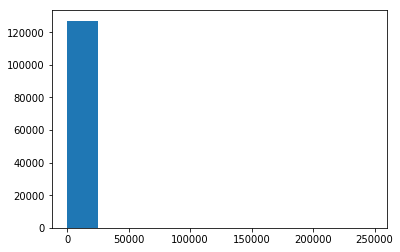

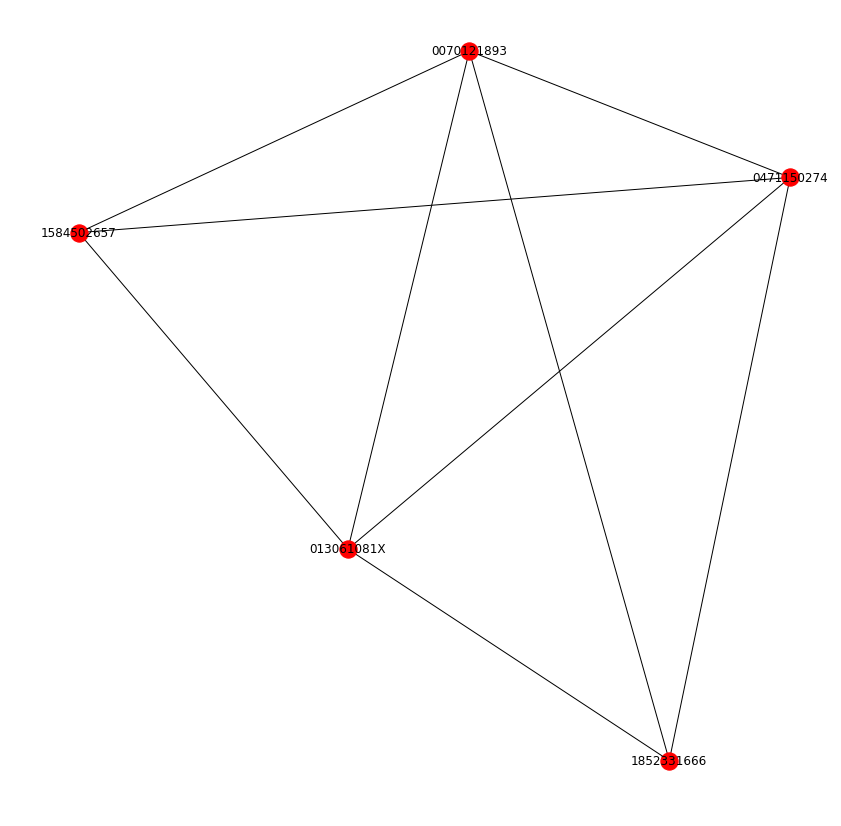

In [59]:
y=[len(c) for c in nx.connected_component_subgraphs(copurchaseGraph)] 
plt.hist(y)
big_sub_book = [i for i in nx.connected_component_subgraphs(copurchaseGraph) if len(i) <12]
plt.figure(figsize=(11, 11))
l=[]
max=0
pos=0
for i in range(0,12):
    x= len(big_sub_book[i])
    l.append(len(big_sub_book[i]))
    if x>max:
        pos=i
        max=x
print(big_sub_book[pos].number_of_nodes(), big_sub_book[pos].number_of_edges())
nx.draw(big_sub_book[pos], with_labels=True)
print(1)

As we can see from the above I decided to visualize a small sub graph because the largest subgraph had about 245000 nodes, which is to big to visualize on my local PC. The above illustrates how a certain books are copurchased.

I also realized that this ASIN copurchasing network is not related to the earlier network that was based of the ID of the products.



[(130208, 12615)]


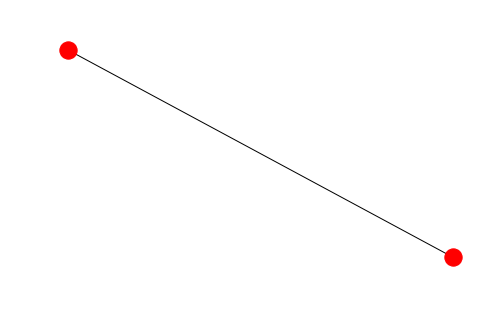

In [66]:
big_sub_book = [i for i in nx.connected_component_subgraphs(copurchaseGraph) if len(i) >247000]

#print(big_sub_book[0].number_of_nodes(), big_sub_book[0].number_of_edges())
amazonBooks['0738700797']
#print(g.number_of_nodes(), g.number_of_edges())
h=g.subgraph([12615,130208])
print(list(h.edges))
#g.subgraph([30,353616,379300])
nx.draw(g.subgraph([12615,130208]))

Let's write out amazonBooks data to the amazon-books.txt file and the copurchaseGraph data to the amazon_books-copurchase.edgelist file

In [67]:
fhw = open("C:/Users/Mezu/Documents/Data620/amazon-books.txt" , 'w', encoding='utf-8', errors ='ignore')
fhw.write("Id\t" + "ASIN\t" + "Title\t" + "Categories\t" + "Group\t" + "Copurchased\t" + "SalesRank\t" + "TotalReviews\t" +
        "AvgRating\t" +"DegreeCentrality\t" + "ClusteringCoeff\n")

for asin,metadata in amazonBooks.items():
    fhw.write(metadata['Id'] + '\t'+ asin + '\t' + metadata['Title'] + "\t" + metadata['Categories'] + "\t" + metadata['Group'] + "\t" + metadata['Copurchased'] + "\t" + str(metadata['SalesRank']) + "\t" + str(metadata['TotalReviews']) +"\t" + str(metadata['AvgRating']) + "\t" + str(metadata['DegreeCentrality']) + '\t' + str(metadata['ClusteringCoeff']) + '\n')
fhw.close()

fhw = open('C:/Users/Mezu/Documents/Data620/amazon-books-copurchase.edgelist','wb')
networkx.write_weighted_edgelist(copurchaseGraph, fhw)
fhw.close()
print(1)

1


Using the processed text files on the metadata of the amazon copurchases and copurchase graph we can now design a recommender system

In [89]:
import networkx
from operator import itemgetter
import matplotlib.pyplot


fhr = open('C:/Users/Mezu/Documents/Data620/amazon-books.txt','r', encoding='utf-8', errors='ignore')
amazonBooks = {}
fhr.readline()
for line in fhr:
    cell =line.split('\t')
    MetaData = {}
    MetaData['Id'] = cell[0].strip()
    ASIN = cell[1].strip()
    MetaData['Title'] = cell[2].strip()
    MetaData['Categories'] = cell[2].strip()
    MetaData['Group'] = cell[4].strip()
    MetaData['Copurchased'] = cell[5].strip()
    MetaData['SalesRank'] = int(cell[6].strip())
    MetaData['TotalReviews'] = int(cell[7].strip())
    MetaData['AvgRating'] = float(cell[8].strip())
    MetaData['DegreeCentrality'] = int(cell[9].strip())
    MetaData['ClusteringCoeff'] = float(cell[10].strip())
    amazonBooks[ASIN] = MetaData
fhr.close()

fhr = open('C:/Users/Mezu/Documents/Data620/amazon-books-copurchase.edgelist','rb')
copurchaseGraph=networkx.read_weighted_edgelist(fhr)
fhr.close()
print(1)

1


We now want to build a recommendation algorithm for the user whenever they enter or search for a given book we need to recommend about 5 books that are similar to them.

We will recommend books that not only where copurchased with the given book in the past (have a degree centrality) but rather examine the books title, salesrank, totalreviews, avgrating, degreecentrality and clusteringcoefficient.
All these attributes weighted together will help us coming up the best selection of books to recommend.


In [69]:
print("Looking for Recommendations for Customer Purchasing this Book:")
print("--------------------------------------------------------------")
purchasedAsin = '0805047905'

print ("ASIN = ", purchasedAsin)
print ("Title = ", amazonBooks[purchasedAsin]['Title'])
print ("SalesRank = ", amazonBooks[purchasedAsin]['SalesRank'])
print ("TotalReviews =", amazonBooks[purchasedAsin]['TotalReviews'])
print('AvgRating = ', amazonBooks[purchasedAsin]['AvgRating'])
print('DegreeCentrality =', amazonBooks[purchasedAsin]['DegreeCentrality'])
print('ClusteringCoeff =', amazonBooks[purchasedAsin]['ClusteringCoeff'])

n=purchasedAsin
ego = networkx.ego_graph(copurchaseGraph,n,radius=1)
purchasedAsinEgoGraph = networkx.Graph(ego)

Looking for Recommendations for Customer Purchasing this Book:
--------------------------------------------------------------
ASIN =  0805047905
Title =  BrownBear,BrownBear,WhatDoYouSee?
SalesRank =  171
TotalReviews = 172
AvgRating =  5.0
DegreeCentrality = 0
ClusteringCoeff = 0.0


Let's draw the Ego network of this specific book we want to find recommendations

1


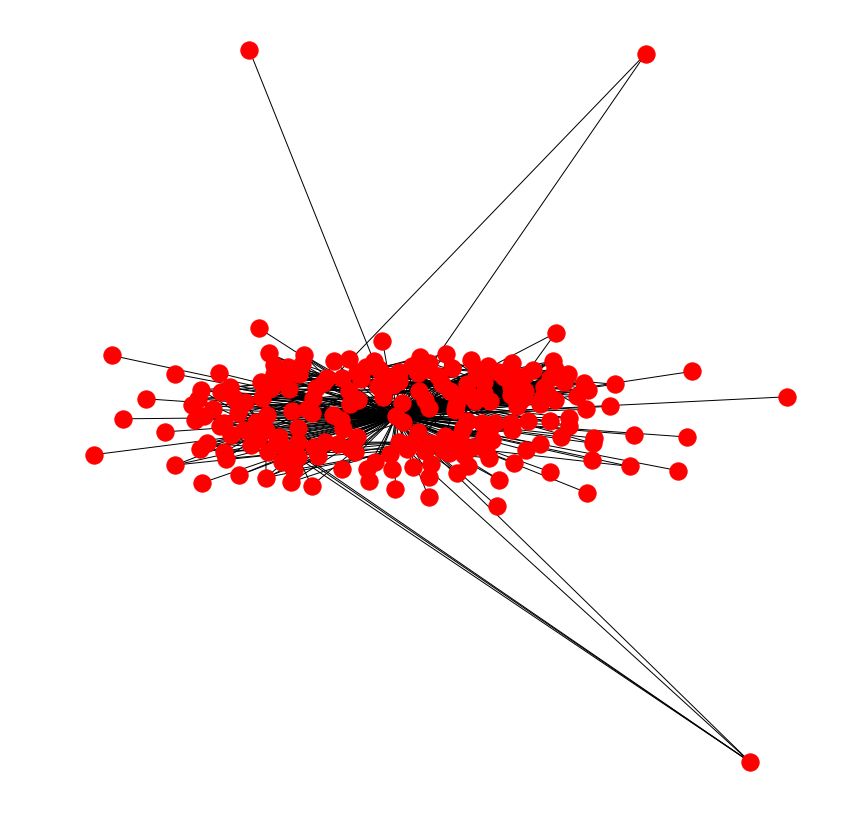

In [71]:
n= purchasedAsin
ego = networkx.ego_graph(copurchaseGraph,n, radius=1)
purchasedAsinEgoGraph = networkx.Graph(ego)
plt.figure(figsize=(11, 11))
nx.draw(purchasedAsinEgoGraph)
print(1)

As we can see this a lot of books that were copurchased with the given book. Now we would like to trim down this graph to only a subset of nodes that have large weights based on other metrics we care about. This is implementing the island method to retain edges where the threshold is >=0.5

83
1


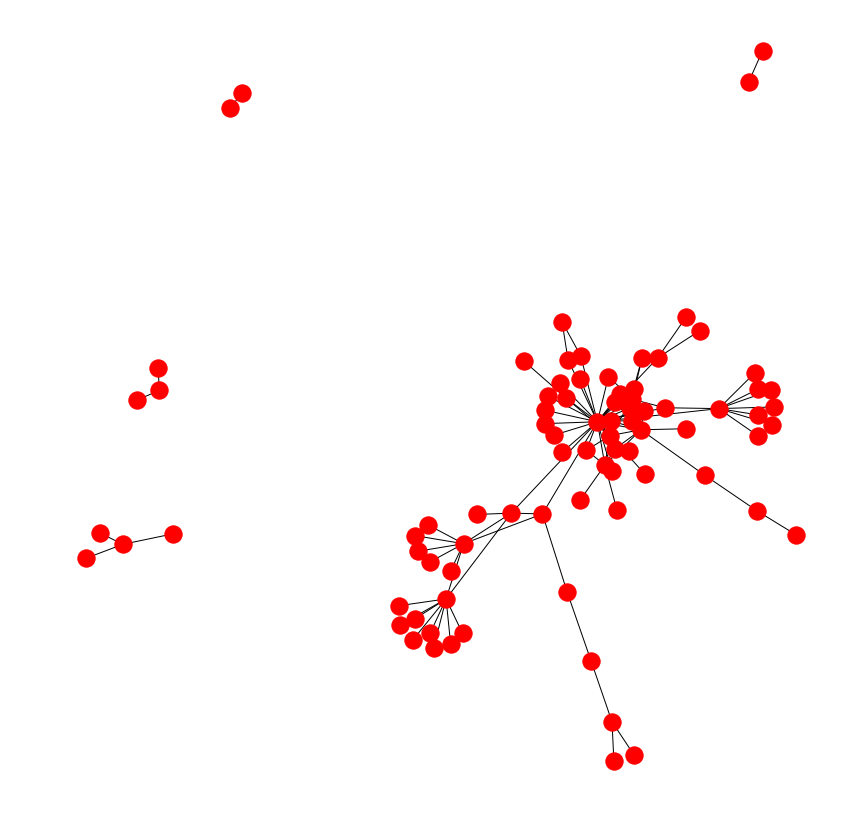

In [113]:
threshold =0.5
purchasedAsinEgoTrimGraph = networkx.Graph()
for f,t,e in purchasedAsinEgoGraph.edges(data =True):
    if e['weight'] >= threshold:
        purchasedAsinEgoTrimGraph.add_edge(f,t,attr_dict=e)
        
purchasedAsinNeighbors = purchasedAsinEgoTrimGraph.neighbors(purchasedAsin)
plt.figure(figsize=(11, 11))
nx.draw(purchasedAsinEgoTrimGraph)
print(purchasedAsinEgoTrimGraph.number_of_nodes())

print(1)

Using the island method we were able to isolate the largest subgraph now we can sort the books in this cluster further to reveal the top 5 books based on the totalreviews they recieved.


However, we first visualize the ego network of the given book to see the strongest links left that our algorithm network ties directly to the book.

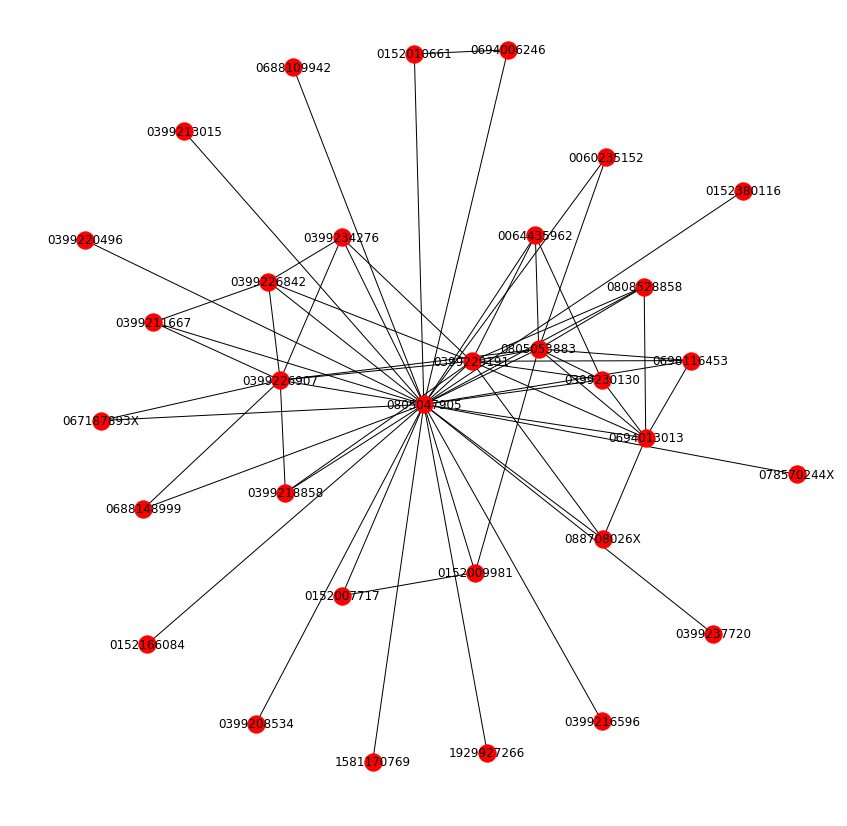

In [111]:


plt.figure(figsize=(11, 11))
trim_ego = nx.ego_graph(purchasedAsinEgoTrimGraph, purchasedAsin)
nx.draw(trim_ego, with_labels=True)



In [114]:

AsMeta = []
count=0

for asin in purchasedAsinNeighbors:
    ASIN = asin
    Title = amazonBooks[asin]['Title']
    SalesRank = amazonBooks[asin]['SalesRank']
    TotalReviews = amazonBooks[asin]['TotalReviews']
    AvgRating = amazonBooks[asin]['AvgRating']
    DegreeCentrality = amazonBooks[asin]['DegreeCentrality']
    ClusteringCoeff = amazonBooks[asin]['ClusteringCoeff']
    AsMeta.append((ASIN, Title, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff))

    
T5_byAvgRating_then_byTotalReviews = sorted(AsMeta, key=lambda x:(x[4],x[3]), reverse=True)[:4]

print(1)

1


We now sort this copurchased books in the ego network first by the Average ratings of the copurchased book then by the total number of reviews. This way we ensure we list the books that are mostly copurchased with the given book that has highest average rating first and for those that were reviewed by as many people as possible.

In [115]:
print()
print('Top 5 Recommendations by AvgRating then by TotalReviews for Users Purchased the book:')
print('-------------------------------------------------------------------------------------')
print (T5_byAvgRating_then_byTotalReviews)

print('ASIN\t','Title\t','SalesRank\t','TotalReviews\t','AvgRating\t','DegreeCentrality\t','ClusteringCoeff')
for asin in T5_byAvgRating_then_byTotalReviews:
    print(asin)
    
print()


Top 5 Recommendations by AvgRating then by TotalReviews for Users Purchased the book:
-------------------------------------------------------------------------------------
[('0152010661', 'TimeforBed', 3122, 87, 5.0, 0, 0.0), ('0694006246', 'BigRedBarnBoardBook', 4457, 40, 5.0, 0, 0.0), ('1581170769', 'WhatMakesaRainbow?:Pop-Up', 40821, 29, 5.0, 0, 0.0), ('0064435962', 'FromHeadtoToe', 187777, 22, 5.0, 0, 0.0)]
ASIN	 Title	 SalesRank	 TotalReviews	 AvgRating	 DegreeCentrality	 ClusteringCoeff
('0152010661', 'TimeforBed', 3122, 87, 5.0, 0, 0.0)
('0694006246', 'BigRedBarnBoardBook', 4457, 40, 5.0, 0, 0.0)
('1581170769', 'WhatMakesaRainbow?:Pop-Up', 40821, 29, 5.0, 0, 0.0)
('0064435962', 'FromHeadtoToe', 187777, 22, 5.0, 0, 0.0)



# REFERENCES

http://www.soteloayuso.com/hadoop-for-amazon-product-co-purchasing-network/
http://thoughtsonroad.blogspot.com/2017/06/visualize-co-purchasing-network-of.html
https://medium.com/@minbaekim/amazon-book-recommendation-system-analysis-d9d72b9a7173

SOURCE DATA
https://snap.stanford.edu/data/com-Amazon.html
https://snap.stanford.edu/data/amazon-meta.html